In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv(r"C:\Users\klemp\Downloads\Boston housing dataset.csv")

In [27]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [28]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT      20
MEDV        0
dtype: int64

In [29]:
#df.head- To see the first 5 rows in the dataframe
df.head(11) #Can be customised to see exact no.of rows 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9


In [30]:
# To get the shape of the dataset, in rows and columns 
df.shape

(506, 13)

In [31]:
# Gives informatoin on features of the data(data type, and non null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    486 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


In [32]:
# .nunique() implies number of unique
df.nunique()

CRIM       484
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        348
DIS        412
RAD          9
TAX         66
PTRATIO     46
LSTAT      438
MEDV       229
dtype: int64

In [33]:
# Code to access a column
# code1
df['CHAS']
# code2
df.CHAS

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Name: CHAS, Length: 506, dtype: float64

In [34]:
df['CHAS']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Name: CHAS, Length: 506, dtype: float64

In [35]:
# To see the unique values
df.CHAS.unique()

array([ 0., nan,  1.])

In [36]:
df.CHAS.value_counts()

CHAS
0.0    452
1.0     34
Name: count, dtype: int64

In [37]:
#  To see the null values an individual column in the df
df.CHAS.isnull().sum()

np.int64(20)

In [38]:
df.duplicated().sum()

np.int64(0)

In [39]:
#
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT      20
MEDV        0
dtype: int64

In [40]:
# to delete duplicate values in a dataframe
df.drop_duplicates(inplace=True)

In [41]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT      20
MEDV        0
dtype: int64

In [42]:
# Mean is to get the average in
df['CRIM'].fillna(df['CRIM'].mean(),inplace=True)
df['ZN'].fillna(df['ZN'].mean(),inplace=True)
df['INDUS'].fillna(df['INDUS'].mean(),inplace=True)
# mode is to get the most repeated element in the set of
df['CHAS'].fillna(df['CHAS'].mode()[0], inplace=True)
# median is of often preferred for skewed distruction
df['AGE'].fillna(df['AGE'].median(), inplace=True)
df['LSTAT'].fillna(df['LSTAT'].median(), inplace=True)

In [43]:
#we will the change the data type of 'CHAS' column from
df['CHAS'] = df['CHAS'].astype('int')

In [44]:

# Statistical summary of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.611874,8.545770,0.00632,0.083235,0.29025,3.611874,88.9762
ZN,506.0,11.211934,22.921051,0.00000,0.000000,0.00000,11.211934,100.0000
INDUS,506.0,11.083992,6.699165,0.46000,5.190000,9.90000,18.100000,27.7400
CHAS,506.0,0.067194,0.250605,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.845850,27.486962,2.90000,45.925000,76.80000,93.575000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [45]:
df.CHAS.info()

<class 'pandas.core.series.Series'>
RangeIndex: 506 entries, 0 to 505
Series name: CHAS
Non-Null Count  Dtype
--------------  -----
506 non-null    int64
dtypes: int64(1)
memory usage: 4.1 KB


In [46]:
#to get the column names in a df
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

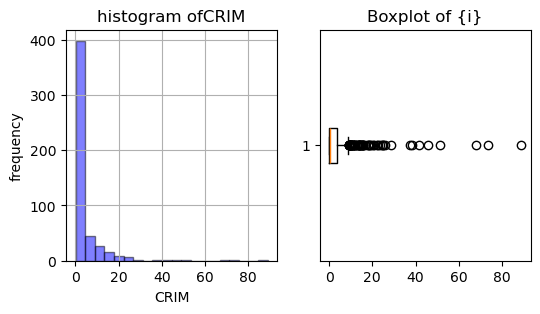

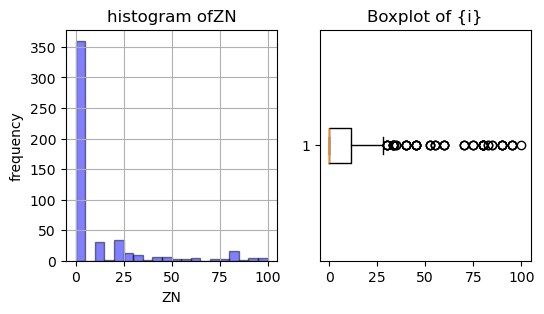

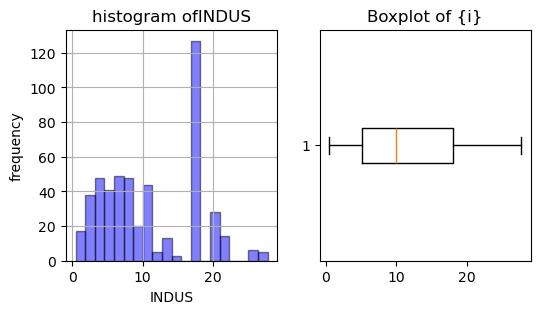

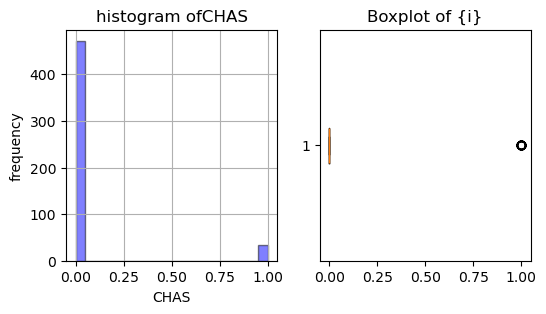

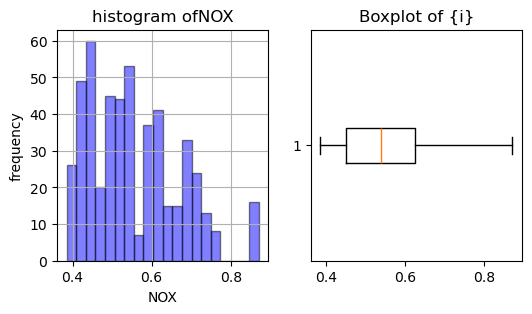

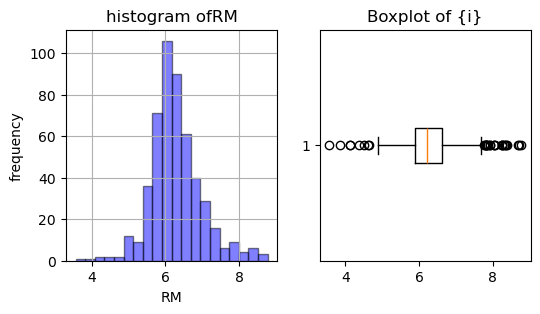

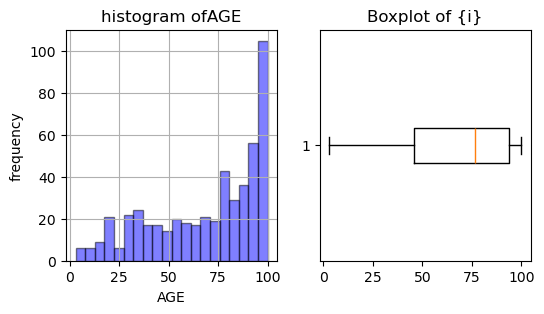

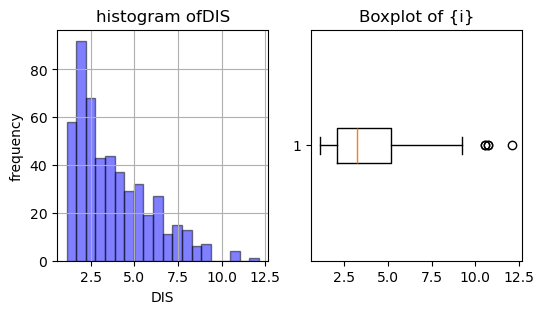

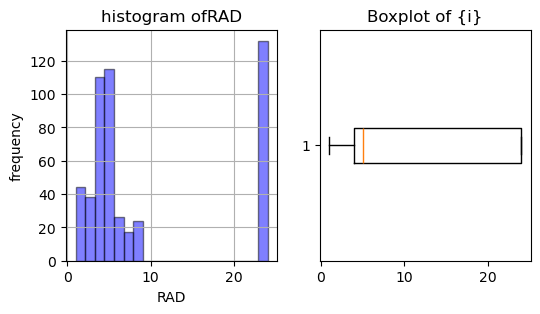

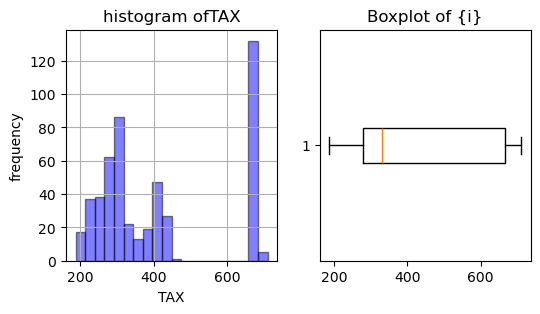

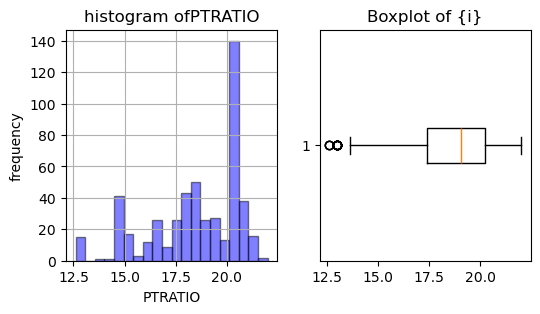

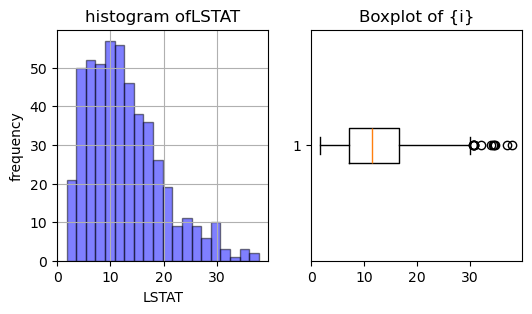

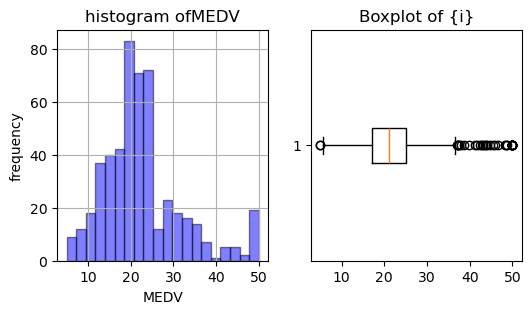

In [59]:
for i in df.columns:
    plt.figure(figsize=(6,3))

    plt.subplot(1 , 2, 1)
    df[i].hist(bins=20,alpha=0.5, color='b',edgecolor='black')
    plt.title(f'histogram of{i}')
    plt.xlabel(i)
    plt.ylabel('frequency')

    plt.subplot(1,2,2)
    plt.boxplot(df[i], vert=False)
    plt.title('Boxplot of {i}')
    plt.show()

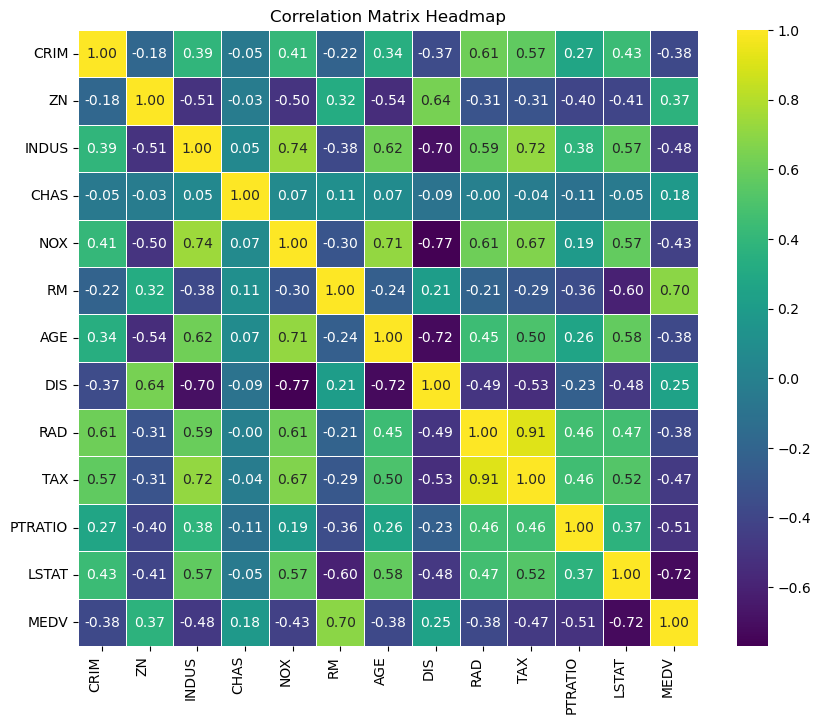

In [49]:
# correlation Heatman for each feachers
corr = df.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="viridis",
            fmt=".2f", linewidth=0.5)
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Matrix Headmap")
plt.show()

In [50]:
# here x implies the independent feachere
x = df.drop('MEDV', axis=1) # all column exept 'MEDV'
# here y implies the dependent feachers on target
y = df['MEDV']

In [51]:
# scale the feachers 
scale = StandardScaler()

#we will pass X values inside standardScaler to scale the values
x_scaled = scale.fit_transform(x)

In [52]:
# Split the data into training (80%) and testing (20%) sets
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y,
    test_size=0.20, random_state=42)

In [53]:
x_train.shape

(404, 12)

In [54]:
x_test.shape

(102, 12)

In [55]:
# Initialize the linear regression model
model = LinearRegression()

#FIt the model on the training data
model.fit(x_train, y_train)

LinearRegression()

In [56]:
# Predict Y values on the test set's X values
y_pred = model.predict(x_test)
y_pred

array([28.84507231, 36.84577384, 13.78597883, 25.06063602, 17.2493215 ,
       23.06799477, 17.67425038, 13.8527243 , 21.16539826, 20.521972  ,
       25.030406  , 18.3104627 , -3.99552644, 21.52740031, 19.13676522,
       24.96524432, 19.49014563,  4.60469786, 40.79294467, 15.86184616,
       25.1799115 , 30.17971299, 11.89009819, 23.35613076, 17.06549529,
       14.59471975, 21.38155619, 17.71332084, 23.27027998, 19.11257609,
       22.53179771, 25.15584922, 24.3827601 , 15.9837617 , 15.96200324,
       17.53747508, 31.15569739, 20.26276619, 24.60368084, 23.048272  ,
       14.02858865, 32.32062928, 42.84226586, 17.53960574, 27.73046849,
       15.28175625, 14.53586762, 26.08654739, 18.59155915, 30.23922582,
       20.77577223, 33.8106763 , 16.09136374, 26.23743506, 39.57808156,
       21.0286039 , 17.12524385, 32.84298877, 25.36094804, 12.5574008 ,
       22.50004114, 30.61560221, 31.35033499, 17.51787483, 20.6294139 ,
       17.2389378 , 18.86350406, 26.18443981, 30.9968289 , 14.75

In [57]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean aquare error (RMSE)
rmse = np.sqrt(mse)

# Calculate r-squared value (accuracy)
r2 = r2_score(y_test, y_pred)

In [58]:
#Calculate root mean squared error
rmse = np.sqrt(mse)
#Calculate r-squared value (accuary)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squaared Error: {rmse}')
print(f'R-Squared: {r2*100:.2f}%')


Mean Squared Error: 23.609950008053886
Root Mean Squaared Error: 4.859007101049955
R-Squared: 67.80%
